<a href="https://colab.research.google.com/github/Lasal0425/Machine-Learning-Tutorials/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

<ipython-input-35-202199ad947c>:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].fillna(df['Age'].median())
<ipython-input-35-202199ad947c>:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())


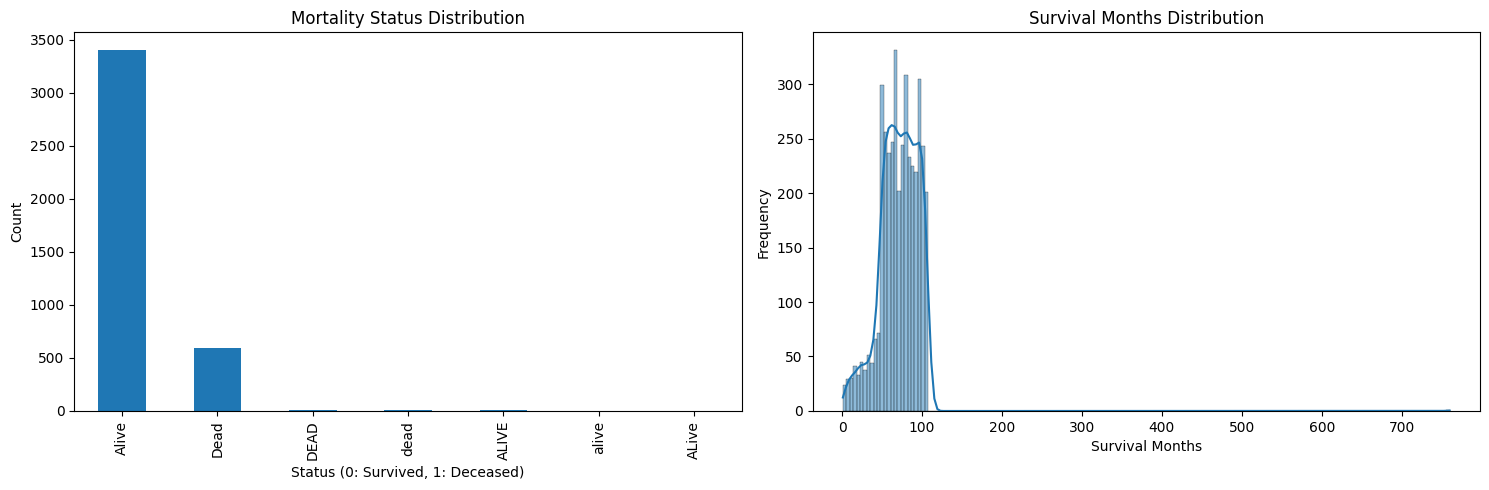

Converting Mortality_Status to numeric...


<Figure size 1000x800 with 0 Axes>

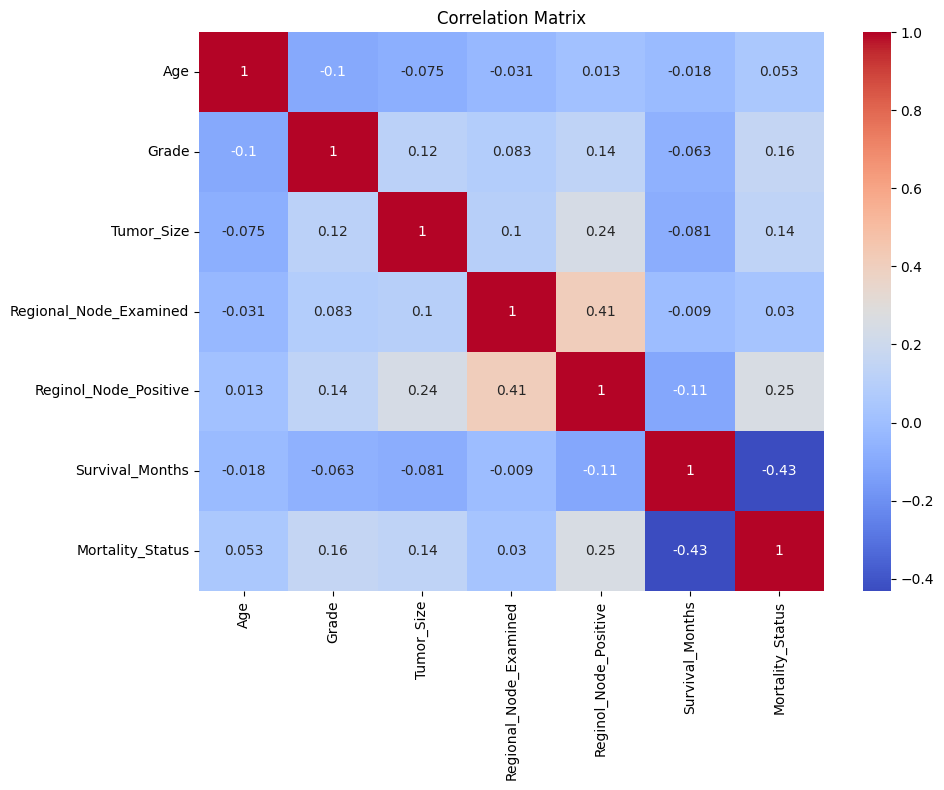

   Month_of_Birth   Age     Sex T_Stage N_Stage 6th_Stage  \
0              12  68.0  Female      T1      N1       IIA   
1              12  50.0  Female      T2      N2      IIIA   
2              11  58.0  Female      T3      N3      IIIC   
3               3  58.0  Female      T1      N1       IIA   
4               1  47.0  Female      T2      N1       IIB   

              Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status  \
0      Poorly differentiated      3  Regional         4.0        Positive   
1  Moderately differentiated      2  Regional        35.0        Positive   
2  Moderately differentiated      2  Regional        63.0        Positive   
3      Poorly differentiated      3  Regional        18.0        Positive   
4      Poorly differentiated      3  Regional        41.0        Positive   

  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0            Positive                    24.0                      1   
1            Positive     

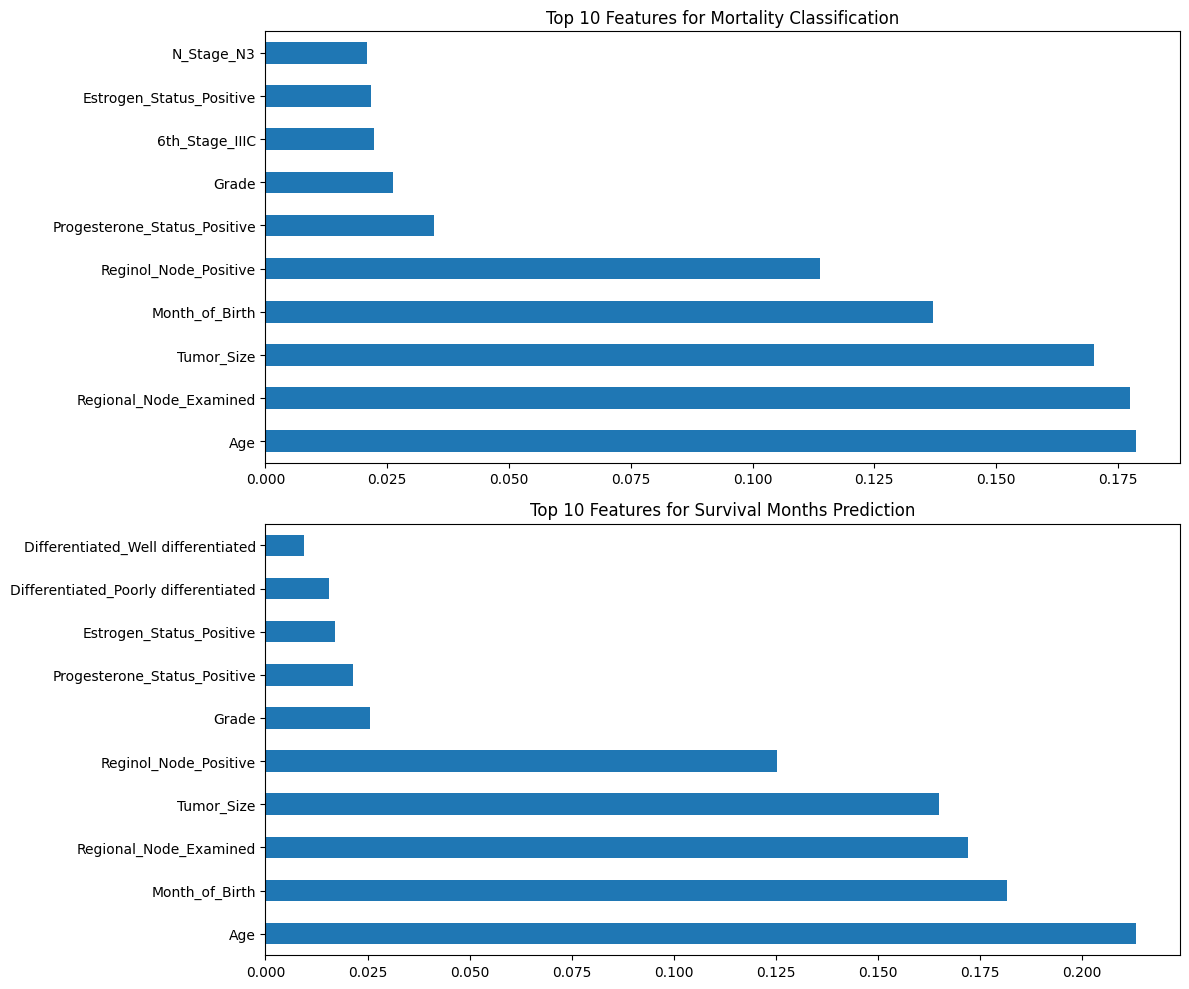

Data preparation and exploration complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Coursework/5DATA002W.2 Coursework Dataset(25012025v6.0).csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()
df.head()

# Check for missing values
df.isnull().sum()

# Drop Occupation column
df.drop('Occupation', axis=1, inplace=True)

# Fill missing values without using inplace=True
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill 'Age' with the median
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])  # Fill 'Sex' with the most frequent value (mode)
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())  # Fill 'Tumor_Size' with the median
df['Regional_Node_Examined'] = df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median())  # Fill 'Regional_Node_Examined' with the median

print("Missing values handled successfully!")

# Verify missing values are handled
df.isnull().sum()

# Check the statistics of numerical columns
df[['Age', 'Tumor_Size', 'Regional_Node_Examined']].describe()

# Fix invalid Age values (negative and extremely high values)
df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 120 else pd.NA)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fix invalid Tumor_Size values (negative values)
df['Tumor_Size'] = df['Tumor_Size'].apply(lambda x: x if x >= 0 else pd.NA)
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())

# Define an upper threshold for Regional_Node_Examined (e.g., 95th percentile)
upper_threshold = df['Regional_Node_Examined'].quantile(0.95)
df['Regional_Node_Examined'] = df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median())

# Ensure numeric columns are properly cast
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Tumor_Size'] = pd.to_numeric(df['Tumor_Size'], errors='coerce')
df['Regional_Node_Examined'] = pd.to_numeric(df['Regional_Node_Examined'], errors='coerce')

# Check statistics after cleaning
df[['Age', 'Tumor_Size', 'Regional_Node_Examined']].describe()

# ENHANCEMENT: Data Visualization for EDA
# Visualize target distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Mortality Status Distribution')
plt.ylabel('Count')
plt.xlabel('Status (0: Survived, 1: Deceased)')

plt.subplot(1, 2, 2)
sns.histplot(df['Survival_Months'], kde=True)
plt.title('Survival Months Distribution')
plt.ylabel('Frequency')
plt.xlabel('Survival Months')

plt.tight_layout()
plt.show()

# ENHANCEMENT: Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
# ENHANCEMENT: Correlation analysis for numerical features
plt.figure(figsize=(10, 8))

# Make sure Mortality_Status is numeric (it seems to contain 'Alive' values)
if df['Mortality_Status'].dtype == 'object':
    print("Converting Mortality_Status to numeric...")
    # Replace 'Alive' with 0 and other values with 1
    df['Mortality_Status'] = df['Mortality_Status'].map(lambda x: 0 if x == 'Alive' else 1)

numeric_cols = ['Age', 'Grade', 'Tumor_Size', 'Regional_Node_Examined',
                'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# ENHANCEMENT: Handle categorical variables
# Identify categorical columns
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Identify numerical columns for scaling
numerical_cols = ['Month_of_Birth', 'Age', 'Grade', 'Tumor_Size',
                 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Scale numerical features
scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(
    scaled_numerics,
    columns=numerical_cols
)

# Combine scaled numerical and encoded categorical features
df_processed = pd.concat([
    scaled_df.reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

# Select features for classification (as you did before)
classification_features = [col for col in df.columns if col not in ['Patient_ID', 'Mortality_Status']]
classification_target = 'Mortality_Status'

# Create the classification DataFrame
df_classification = df[classification_features + [classification_target]].copy()
print(df_classification.head())

# Select features for regression (as you did before)
regression_features = [col for col in df.columns if col not in ['Patient_ID', 'Survival_Months']]
regression_target = 'Survival_Months'

# Create the regression DataFrame
df_regression = df[regression_features + [regression_target]].copy()
print(df_regression.head())

# ENHANCEMENT: Create train-test splits
# For classification
X_class = df_processed.copy()
y_class = df['Mortality_Status']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# For regression
X_reg = df_processed.copy()
y_reg = df['Survival_Months']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Save the original dataframes as you did before
df_classification.to_csv('cancer_classification_dataset.csv', index=False)
df_regression.to_csv('cancer_regression_dataset.csv', index=False)

# ENHANCEMENT: Save the processed and split datasets
# Save all processed datasets
X_train_class.to_csv('X_train_classification.csv', index=False)
y_train_class.to_csv('y_train_classification.csv', index=False)
X_test_class.to_csv('X_test_classification.csv', index=False)
y_test_class.to_csv('y_test_classification.csv', index=False)

X_train_reg.to_csv('X_train_regression.csv', index=False)
y_train_reg.to_csv('y_train_regression.csv', index=False)
X_test_reg.to_csv('X_test_regression.csv', index=False)
y_test_reg.to_csv('y_test_regression.csv', index=False)

print("All datasets successfully created and saved!")

# ENHANCEMENT: Feature importance analysis using a simple model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# For classification
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)

# For regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Plot feature importances
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
feature_importances = pd.Series(rf_class.feature_importances_, index=X_train_class.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Features for Mortality Classification')

plt.subplot(2, 1, 2)
feature_importances = pd.Series(rf_reg.feature_importances_, index=X_train_reg.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Features for Survival Months Prediction')

plt.tight_layout()
plt.show()

print("Data preparation and exploration complete!")